In [217]:
## Problem statement
# Patients has this disease or not prediction using logistic regression

In [218]:
## Libraries
#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [219]:
## Load dataset
#

dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [220]:
## General informaion 
#

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [221]:
## Statistical information
#

dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [222]:
## Check for missing values
#

dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

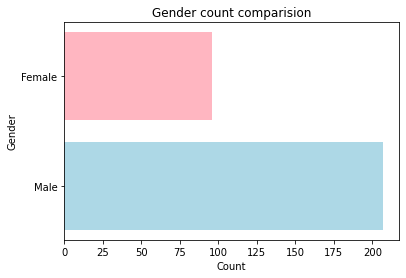

In [223]:
## Data visualization for analysis
#

# bar plot age count
# using matplotlib
label = ['Male', 'Female']
data = list(dataset.sex.value_counts())

plt.barh(label, data, color = ['lightblue', 'lightpink'])
plt.title('Gender count comparision')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()
plt.close()

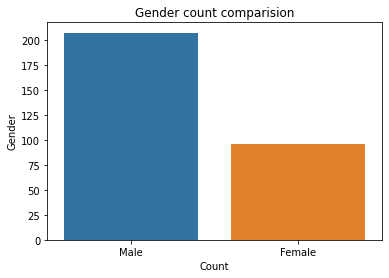

In [224]:
# bar plot age count
# using seaborn
#

import seaborn as sns

sns.barplot(label, data)
plt.title('Gender count comparision')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()
plt.close()

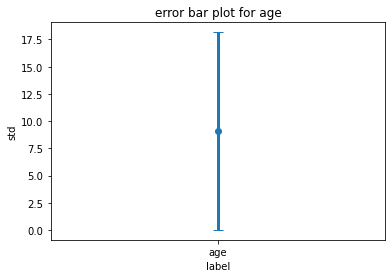

In [225]:
# how age is spread and its reliability
#

data = dataset.age
data_mean = data.mean()
data_std = data.std()

bars = [data_std]
bar_category = ['age']
error_bars = [data_std]

plt.errorbar(bar_category, bars, yerr = error_bars,
             fmt = 'o', elinewidth = 3,
             alpha = 1, capsize = 5)
plt.title('error bar plot for age')
plt.xlabel('label')
plt.ylabel('std')
plt.show()
plt.close()

## Conclusion
# the SD bar is big so data are more variable from mean and less reliable


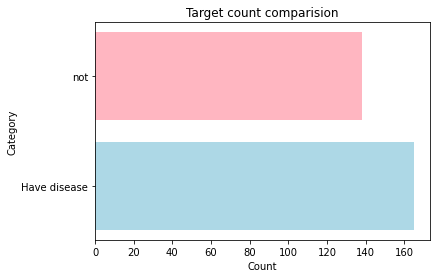

In [226]:
# target count
#

label = ['Have disease', 'not']
data = list(dataset.target.value_counts())

plt.barh(label, data, color = ['lightblue', 'lightpink'])
plt.title('Target count comparision')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()
plt.close()

In [227]:
## Percentage information
#
import math

male_cnt = dataset.sex.value_counts()[1]
total_cnt = dataset.sex.count()
female_per = 100 - (male_cnt/total_cnt) * 100
male_per = 100 - female_per
print("Percentage of Male : {} %".format(math.floor(male_per)))
print("Percentage of Female : {} %".format(math.ceil(female_per)))

have = math.floor((dataset.target.value_counts()[1] / dataset.target.count()) * 100)
not_have = 100 - have
print("Percentage of Have : {} %".format(math.floor(have)))
print("Percentage of Not have : {} %".format(not_have))



Percentage of Male : 68 %
Percentage of Female : 32 %
Percentage of Have : 54 %
Percentage of Not have : 46 %


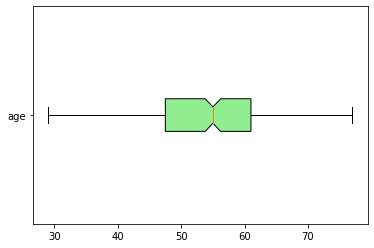

In [228]:
# box plot for age
data = dataset.age
box_plot_data = [data]

box = plt.boxplot(box_plot_data, patch_artist = True,
            labels = ['age'], notch = True, vert = 0, )

colors = ['lightgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

## Conclusion
# It is good way to visualize data through their quartile.
# Least value is below 30.
# Lower quartile is above 45 and belwo 50.
# Median is near 55.
# Upper quartile is above 60 and below 65.
# Highest value is above 75.


Bins required : 6


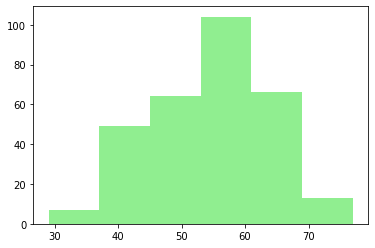

In [230]:
# histogram for age
#

import math

def find_bins(X):
    N = len(X)
    K = 1 + 3.322 * math.log(55, 10)
    K = math.floor(K)
    return K

X = dataset.age
N = find_bins(X)

print("Bins required : {}".format(N))

plt.hist(X, bins = N, facecolor = 'lightgreen', width = 8)
plt.show()
plt.close()

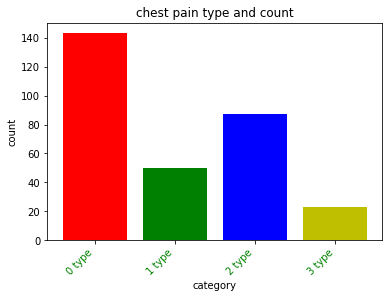

In [231]:
# chest pain type - cp
#

category_names = ['0 type', '1 type', '2 type', '3 type']
category = dataset.cp.value_counts().sort_index().to_list()
plt.bar(category_names, category, color = 'rgbymck')
plt.xticks(color = 'green', rotation = 45, horizontalalignment = 'right')
plt.title('chest pain type and count')
plt.xlabel('category')
plt.ylabel('count')
plt.show()
plt.close()

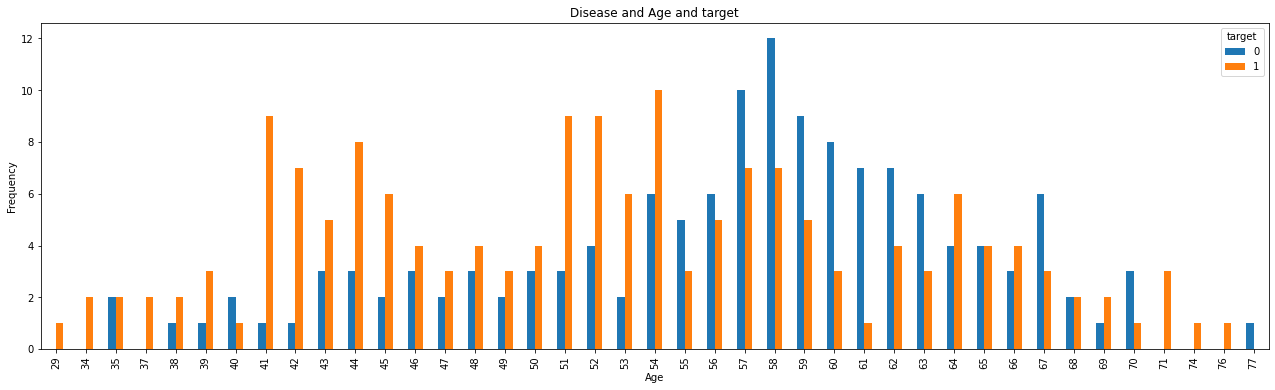

In [232]:
# Disease with age and target
#
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(22,6))
plt.title('Disease and Age and target')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [233]:
## Dependent and Independent variables
#

X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [234]:
## Splitting 
#
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [235]:
#
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2


In [236]:
#
X_test.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
225   70    1   0       145   174    0        1      125      1      2.6   
152   64    1   3       170   227    0        0      155      0      0.6   
228   59    1   3       170   288    0        0      159      0      0.2   
201   60    1   0       125   258    0        0      141      1      2.8   
52    62    1   2       130   231    0        1      146      0      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
146   44    0   2       118   242    0        1      149      0      0.3   
302   57    0   1       130   236    0        0      174      0      0.0   
26    59    1   2       150   212    1        1      157      0      1.6   
108   50    0   1       120   244    0        1      162      0      1.1   
89    58    0   0       100   248    0        0      122      0      1.0   

     slope  ca  thal  
225      0   0     3  
152      1 

In [237]:
#
Y_train.head()

74     1
153    1
64     1
296    0
287    0
Name: target, dtype: int64

In [238]:
# 
Y_test.head()

225    0
152    1
228    0
201    0
52     1
Name: target, dtype: int64

In [239]:
## Scaler need to scale data into one format
#
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [240]:
## Lets try logistic regression classification
#
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [241]:
## Prediction
#
Y_pred = lr.predict(X_test)

In [242]:
## Check corrections
#
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_test,Y_pred)
cm_lr

array([[21,  6],
       [ 3, 31]], dtype=int64)

In [243]:
## Find accuracy
#
accuracy = lr.score(X_test, Y_test)
accuracy

0.8524590163934426

In [244]:
## Predictions
#
lr.predict(sc_x.transform([[30, 0, 2, 122, 213, 0, 1, 165, 0, 0.2, 1, 0, 2]]))

array([1], dtype=int64)

In [245]:
## Convert
#
!jupyter nbconvert --to script heart_disease_classification.ipynb

[NbConvertApp] Converting notebook heart_disease_classification.ipynb to script
[NbConvertApp] Writing 5114 bytes to heart_disease_classification.py


In [ ]:
## End
#